# Introduction

The film industry has a massive impact on the lives of many.  From the stories told influencing the audience, to the massive economic impact including ticket sales, merchandise, employment etc. With so many people relying on the success of the industry understanding what makes a successful movie is imperative.  This analysis is aimed at answering the question: What variables impact the reveune generated by a film?  The working hypothesis is the average rating from IMDB, budget, runtime, primary genre and whether or not the film's target audience consisting of adults have a correlation with revenue generated.

# Dataset

The working dataset is available on Kaggle and consists of film entries sourced from IMDB.  The dataset consists of 1,072,255 entries with 42 features.  These features will be narrowed significantly to simplify the analysis and create a more robust model.

Features included in this analysis:
- vote_average (Average IMDB Rating)
- budget
- runtime (Length of film in minutes)
- adult (True or False based on whether or not the film is targeting an adult audience)
- genre (created by the first entry of the genres_list feature)

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from matplotlib.gridspec import GridSpec

In [5]:
# import and view dataset
df = pd.read_csv('datasets/movies.csv')
df.head(3)

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,Star3,Star4,Writer,Director_of_Photography,Producers,Music_Composer,genres_list,Cast_list,overview_sentiment,all_combined_keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Elliot Page,Ken Watanabe,Christopher Nolan,Wally Pfister,"Thomas Tull, Christopher Nolan, Chris Brigham,...",Hans Zimmer,"['Action', 'Science Fiction', 'Adventure']","['Tim Kelleher', 'Silvie Laguna', 'Natasha Bea...",-0.011111,"['s', 'philosophy', 'skilled', 'kidnapping', '..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Jessica Chastain,Mackenzie Foy,Jonathan Nolan,Hoyte van Hoytema,"Jake Myers, Emma Thomas, Jordan Goldberg, Thom...",Hans Zimmer,"['Adventure', 'Drama', 'Science Fiction']","['Jeff Hephner', 'William Devane', 'Elyes Gabe...",0.045455,"['thoughtful', 'use', 'scientist', 'quantum me..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,Aaron Eckhart,Michael Caine,Jonathan Nolan,Wally Pfister,"Kevin De La Noy, Thomas Tull, Christopher Nola...","Hans Zimmer, James Newton Howard","['Drama', 'Action', 'Crime', 'Thriller']","['Tommy Lister Jr.', 'Edison Chen', 'Beatrice ...",0.025000,"['reign', 'harvey', 'proves', 'partnership', '..."


In [6]:
# display size of dataset
df.shape

(1072255, 42)

In [7]:
# display features and respective data types
df.dtypes

id                           int64
title                       object
vote_average               float64
vote_count                   int64
status                      object
release_date                object
revenue                      int64
runtime                      int64
adult                         bool
backdrop_path               object
budget                       int64
homepage                    object
imdb_id                     object
original_language           object
original_title              object
overview                    object
popularity                 float64
poster_path                 object
tagline                     object
production_companies        object
production_countries        object
spoken_languages            object
keywords                    object
release_year               float64
Director                    object
AverageRating              float64
Poster_Link                 object
Certificate                 object
IMDB_Rating         

# Preprocessing

Preprocessing of the dataset began with creating a new feature called genre. This feature contains the primary genre of the film listed in the first position of the genres_list feature.  This is to create a more general summary of the film that can be used easily in determining the relationship to revenue.  

Summary statistics were then displayed to get an overview of the data.  This illustrated that instead of having null values in the dataset zeroes were assigned. To eliminate these entries, the dataset was subsetted to include only entries with non-zero numbers for quantitative features.

The genre entry was then assessed by unique values.  This was to ensure conflicting entries were not in the dataset, for example 'Action' and 'action' would be treated like two different genres throughout the analysis even though they are equivalent in meaning.  The only issue found was with the 'Unknown' category being listed.  The works with this value have a genre inherently and an unknown category does not provide any insight to the relationship with revenue, therefore entries with these values were dropped from the dataset.

Quantitave variables were then visualized for distribution.  Initially revenue, budget, and runtime were heavily skewed to the left.  To correct this and the vote_average variable, outliers were removed from the dataset for each variable by means of the 1.5 * IQR method.  Skewnewss decreased heavily for all variables, however revenue and budget remain skewed left.

Categorical variable distributions were then assessed for skewness.  Of the remaining entries in the dataset only 9 films were aimed towards an adult audience.  Because of the low amount of representation, the adult variable will not be assessed with its relationship to revenue.  For the genre variable the distribution of entries was uneven.  Entries corresponding to categories with less than 30 entries were dropped from the dataset for not having enough representation.  The next lowest number or entries corresponding to a genre consisted of 45 entries.  The dataset was then sampled to have a representation of 45 entries for every category of genre remaining, completely evening out the distribution of genres.

In [9]:
# Convert each entry in genres_list to a list
df['genres_list'] = df['genres_list'].apply(lambda x: ast.literal_eval(x))

In [10]:
# create primary genre variable
df['genre'] = df['genres_list'].apply(lambda x: x[0] if len(x) > 0 else None)
print(df['genre'].head(3))

0       Action
1    Adventure
2        Drama
Name: genre, dtype: object


In [11]:
# subset dataset to consist only of variables of interest
df = df[['revenue', 'budget', 'vote_average', 'runtime', 'adult', 'genre']]

In [12]:
df.describe()

,revenue,budget,vote_average,runtime
count,1.072255e+06,1.072255e+06,1.072255e+06,1.072255e+06
mean,7.181273e+05,2.797329e+05,1.979590e+00,4.918518e+01
std,1.808345e+07,5.067542e+06,3.063890e+00,6.204454e+01
min,-1.200000e+01,0.000000e+00,0.000000e+00,-2.800000e+01
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01
75%,0.000000e+00,0.000000e+00,5.000000e+00,9.000000e+01
max,3.000000e+09,9.000000e+08,1.000000e+01,1.440000e+04


In [13]:
# drop entries that do not have a value for quantitative variables
columns = ['budget', 'revenue', 'vote_average', 'runtime']
for column in columns: df = df[df[column] != 0]

In [14]:
df.describe()

,revenue,budget,vote_average,runtime
count,1.045500e+04,1.045500e+04,10455.000000,10455.000000
mean,6.446650e+07,2.277360e+07,6.552221,105.126447
std,1.568126e+08,3.763348e+07,1.265029,36.511956
min,-1.200000e+01,1.000000e+00,0.800000,1.000000
25%,1.400000e+06,1.600000e+06,5.879500,92.000000
50%,1.160354e+07,8.700000e+06,6.500000,104.000000
75%,5.500000e+07,2.600000e+07,7.147000,120.000000
max,3.000000e+09,4.600000e+08,10.000000,999.000000


In [15]:
df.isna().sum()

revenue         0
budget          0
vote_average    0
runtime         0
adult           0
genre           0
dtype: int64

In [16]:
df['genre'].unique()

array(['Action', 'Adventure', 'Drama', 'Science Fiction', 'Thriller',
       'Comedy', 'Crime', 'Animation', 'Fantasy', 'Horror', 'Family',
       'Mystery', 'Western', 'History', 'Music', 'War', 'Romance',
       'Documentary', 'TV Movie', 'Unknown'], dtype=object)

In [17]:
df['genre'] = df['genre'].replace('Unknown', None)
df['genre'].isna().sum()

127

In [18]:
df.dropna(inplace=True)
df.isna().sum()

revenue         0
budget          0
vote_average    0
runtime         0
adult           0
genre           0
dtype: int64

In [19]:
df.head(3)

,revenue,budget,vote_average,runtime,adult,genre
0,825532764,160000000,8.364,148,False,Action
1,701729206,165000000,8.417,169,False,Adventure
2,1004558444,185000000,8.512,152,False,Drama


# Data Understanding/Visualization
## Quantitative Variables

In [21]:
def boxplotVisualize(df):
    # Visualize quantitative variable distributions
    fig,ax=plt.subplots(nrows=2, ncols=4, figsize=(22, 10))
    fig.suptitle('Quantitative Data Visualizations', fontsize=22)
    
    columns = ['revenue', 'budget', 'vote_average', 'runtime']
    
    for i in range(4):
        df.boxplot(column=columns[i], ax=ax[0,i])
        sns.histplot(df[columns[i]], kde=True, ax=ax[1, i])  
    
    plt.show()

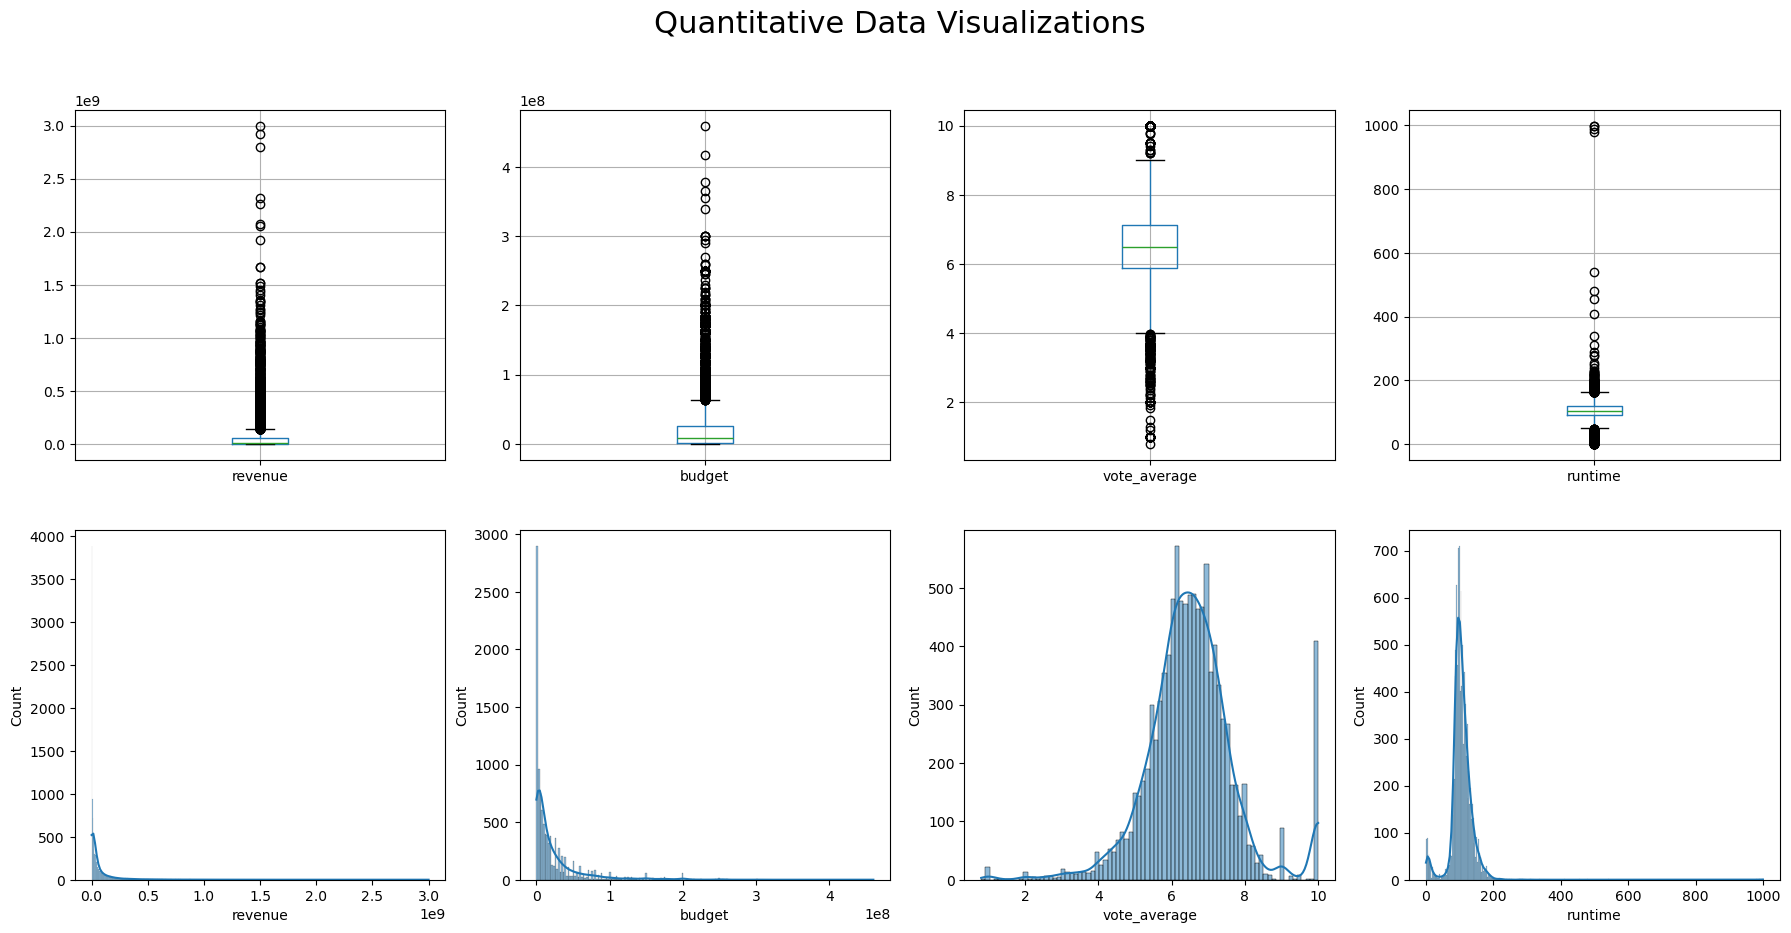

In [22]:
boxplotVisualize(df)

In [23]:
#Function to remove outliers based on IQR
def removeOutliersIQR(df, column):

    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    
    iqr = q3 - q1
    upperThreshold = q3 + (1.5 * iqr)
    lowerThreshold = q1 - (1.5 * iqr)
    
    df = df[(df[column] <= upperThreshold) & (df[column] >= lowerThreshold)]    
    
    return df

In [24]:
# remove outliers
df = removeOutliersIQR(df, 'runtime')
df = removeOutliersIQR(df, 'vote_average')
df = removeOutliersIQR(df, 'budget')
df = removeOutliersIQR(df, 'revenue')
df.describe()

,revenue,budget,vote_average,runtime
count,7.516000e+03,7.516000e+03,7516.000000,7516.000000
mean,2.043189e+07,1.271483e+07,6.346868,106.231772
std,2.585959e+07,1.440334e+07,0.851974,18.404779
min,1.000000e+00,1.000000e+00,4.046000,50.000000
25%,1.685572e+06,2.000000e+06,5.800000,93.000000
50%,9.013582e+06,7.000000e+06,6.375000,103.000000
75%,3.003291e+07,1.900000e+07,6.964000,117.000000
max,1.089025e+08,7.000000e+07,8.800000,162.000000


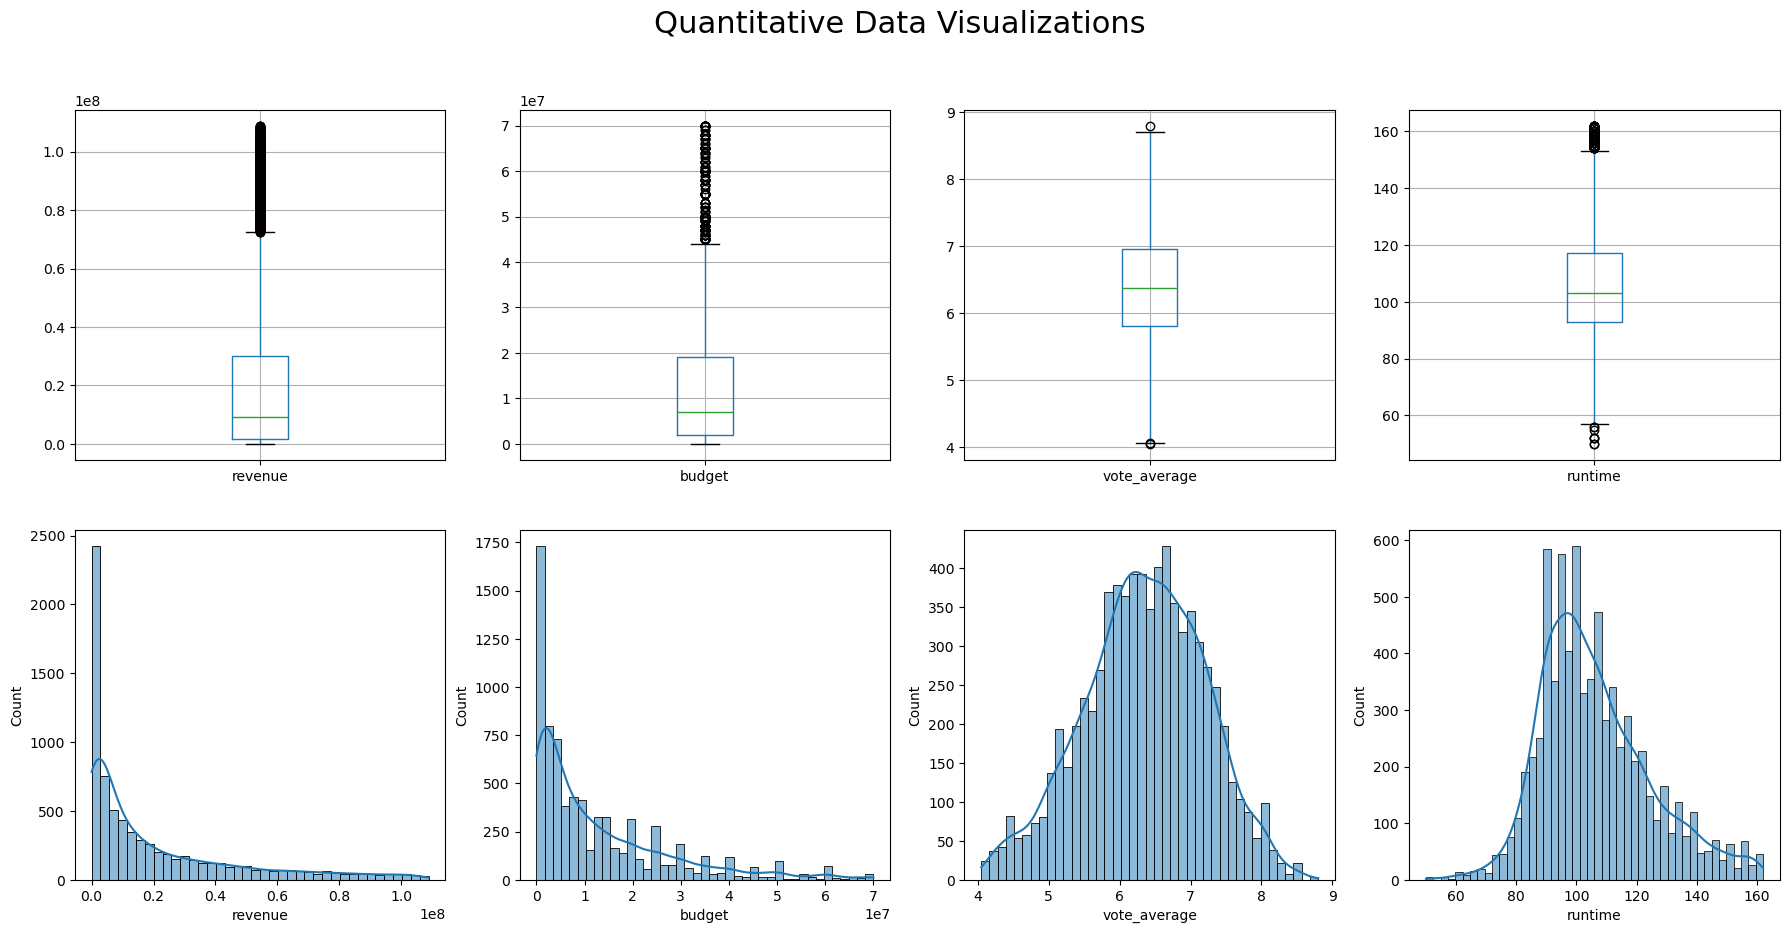

In [25]:
boxplotVisualize(df)

# Categorical Variaables

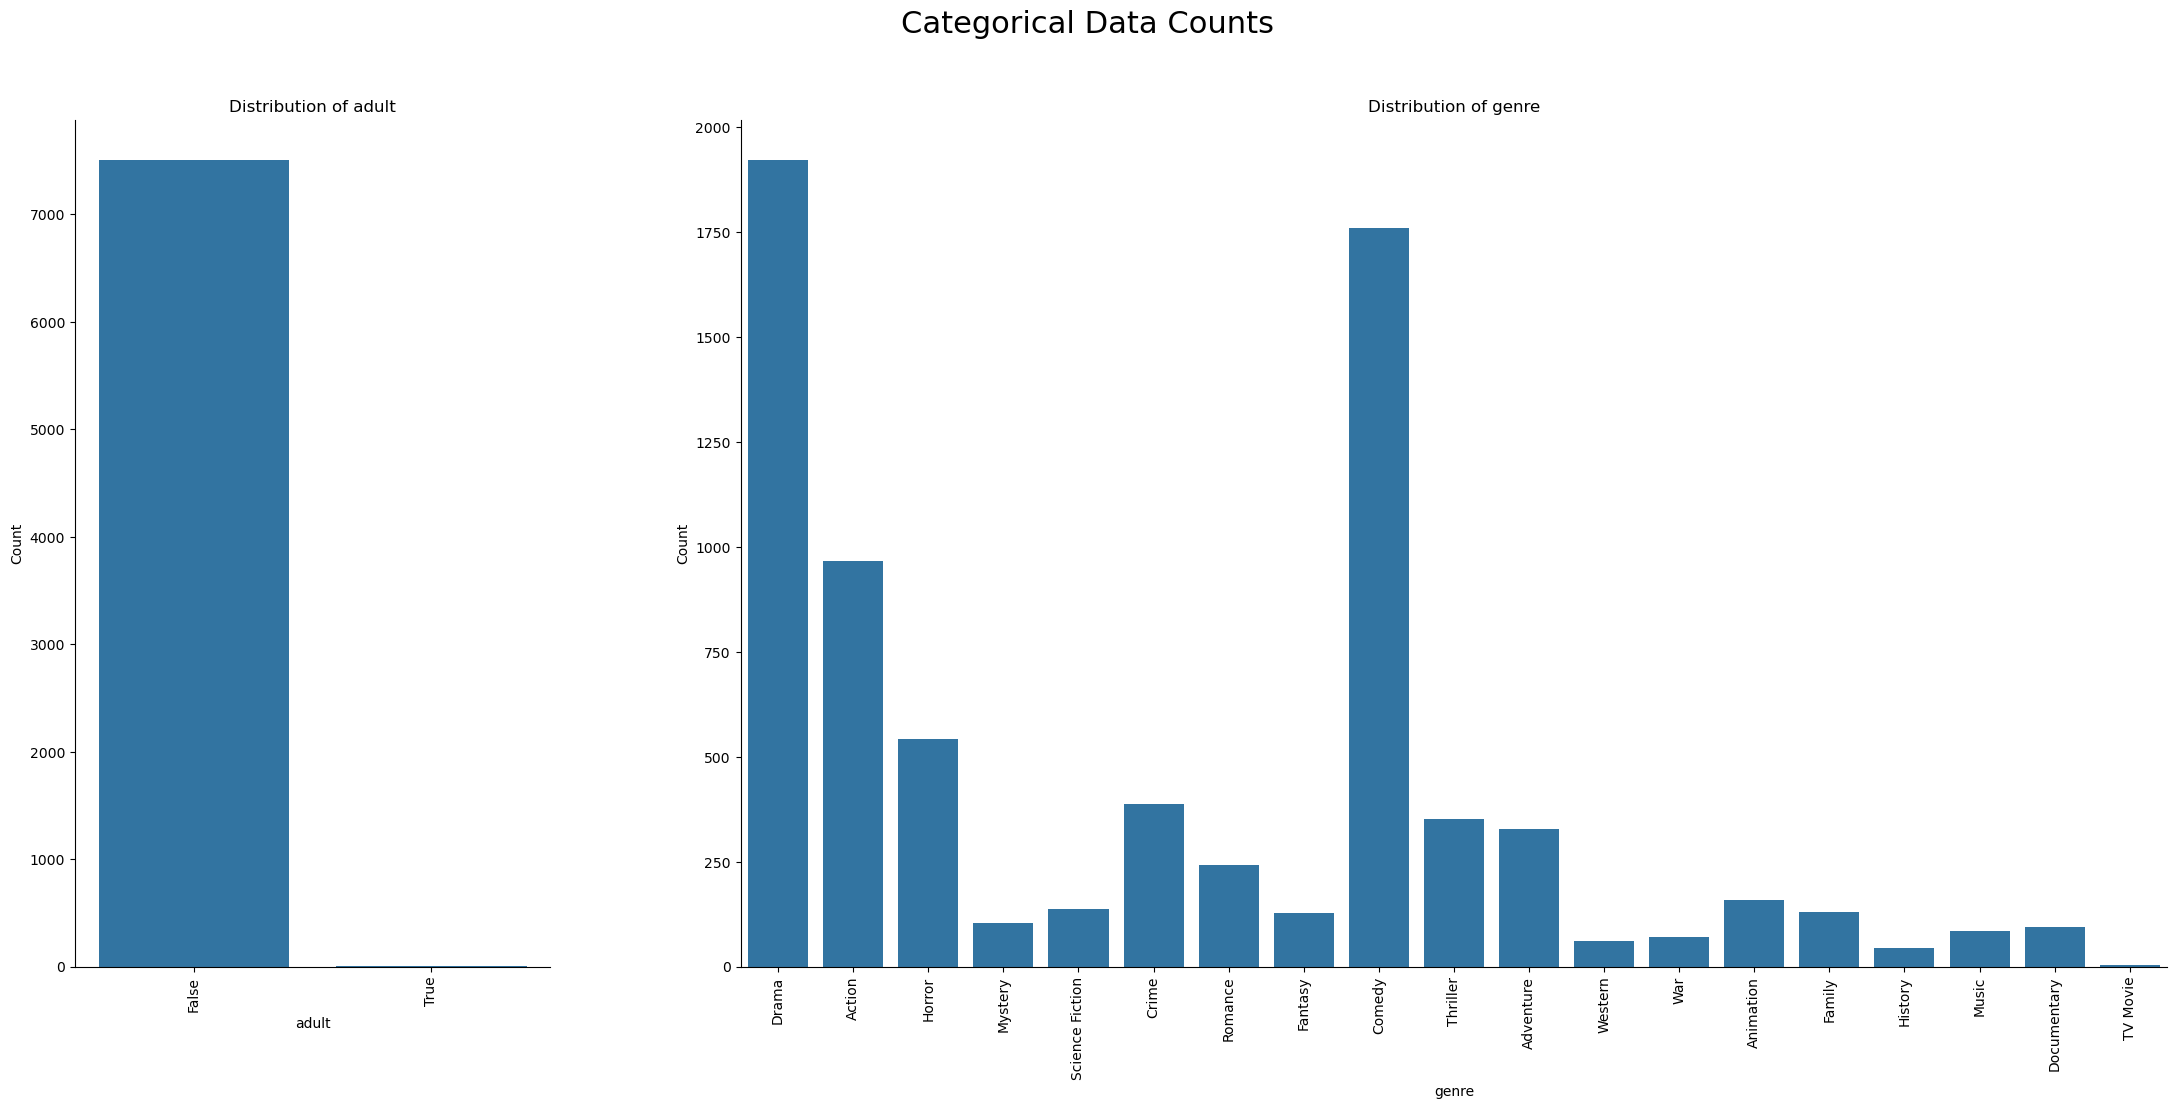

In [27]:
# Create catagorical visualizations
fig = plt.figure(figsize=(27, 11))
gs = GridSpec(1, 2, width_ratios=[1, 3])
ax = [fig.add_subplot(gs[0]), fig.add_subplot(gs[1])]
fig.suptitle('Categorical Data Counts', fontsize=22)

# Variables to be visualized
columns = ['adult', 'genre']

for i in range(2):
    sns.countplot(x=columns[i], data=df, ax=ax[i]); ax[i].set_title('Distribution of ' + columns[i])
    ax[i].set_ylabel('Count'); ax[i].set_xlabel(columns[i])
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].spines['top'].set_visible(False); ax[i].spines['right'].set_visible(False)

plt.subplots_adjust(hspace=.8)
plt.show()

In [28]:
df['adult'].sum()

9

In [29]:
df['genre'].value_counts()

genre
Drama              1921
Comedy             1760
Action              967
Horror              541
Crime               388
Thriller            352
Adventure           328
Romance             243
Animation           158
Science Fiction     138
Family              129
Fantasy             127
Mystery             104
Documentary          94
Music                85
War                  71
Western              62
History              45
TV Movie              3
Name: count, dtype: int64

In [30]:
df = df[df['genre'] != 'TV Movie']

In [31]:
sampled_df = df.groupby('genre').apply(lambda x: x.sample(n=45, random_state=42), include_groups=True)

  sampled_df = df.groupby('genre').apply(lambda x: x.sample(n=45, random_state=42), include_groups=True)


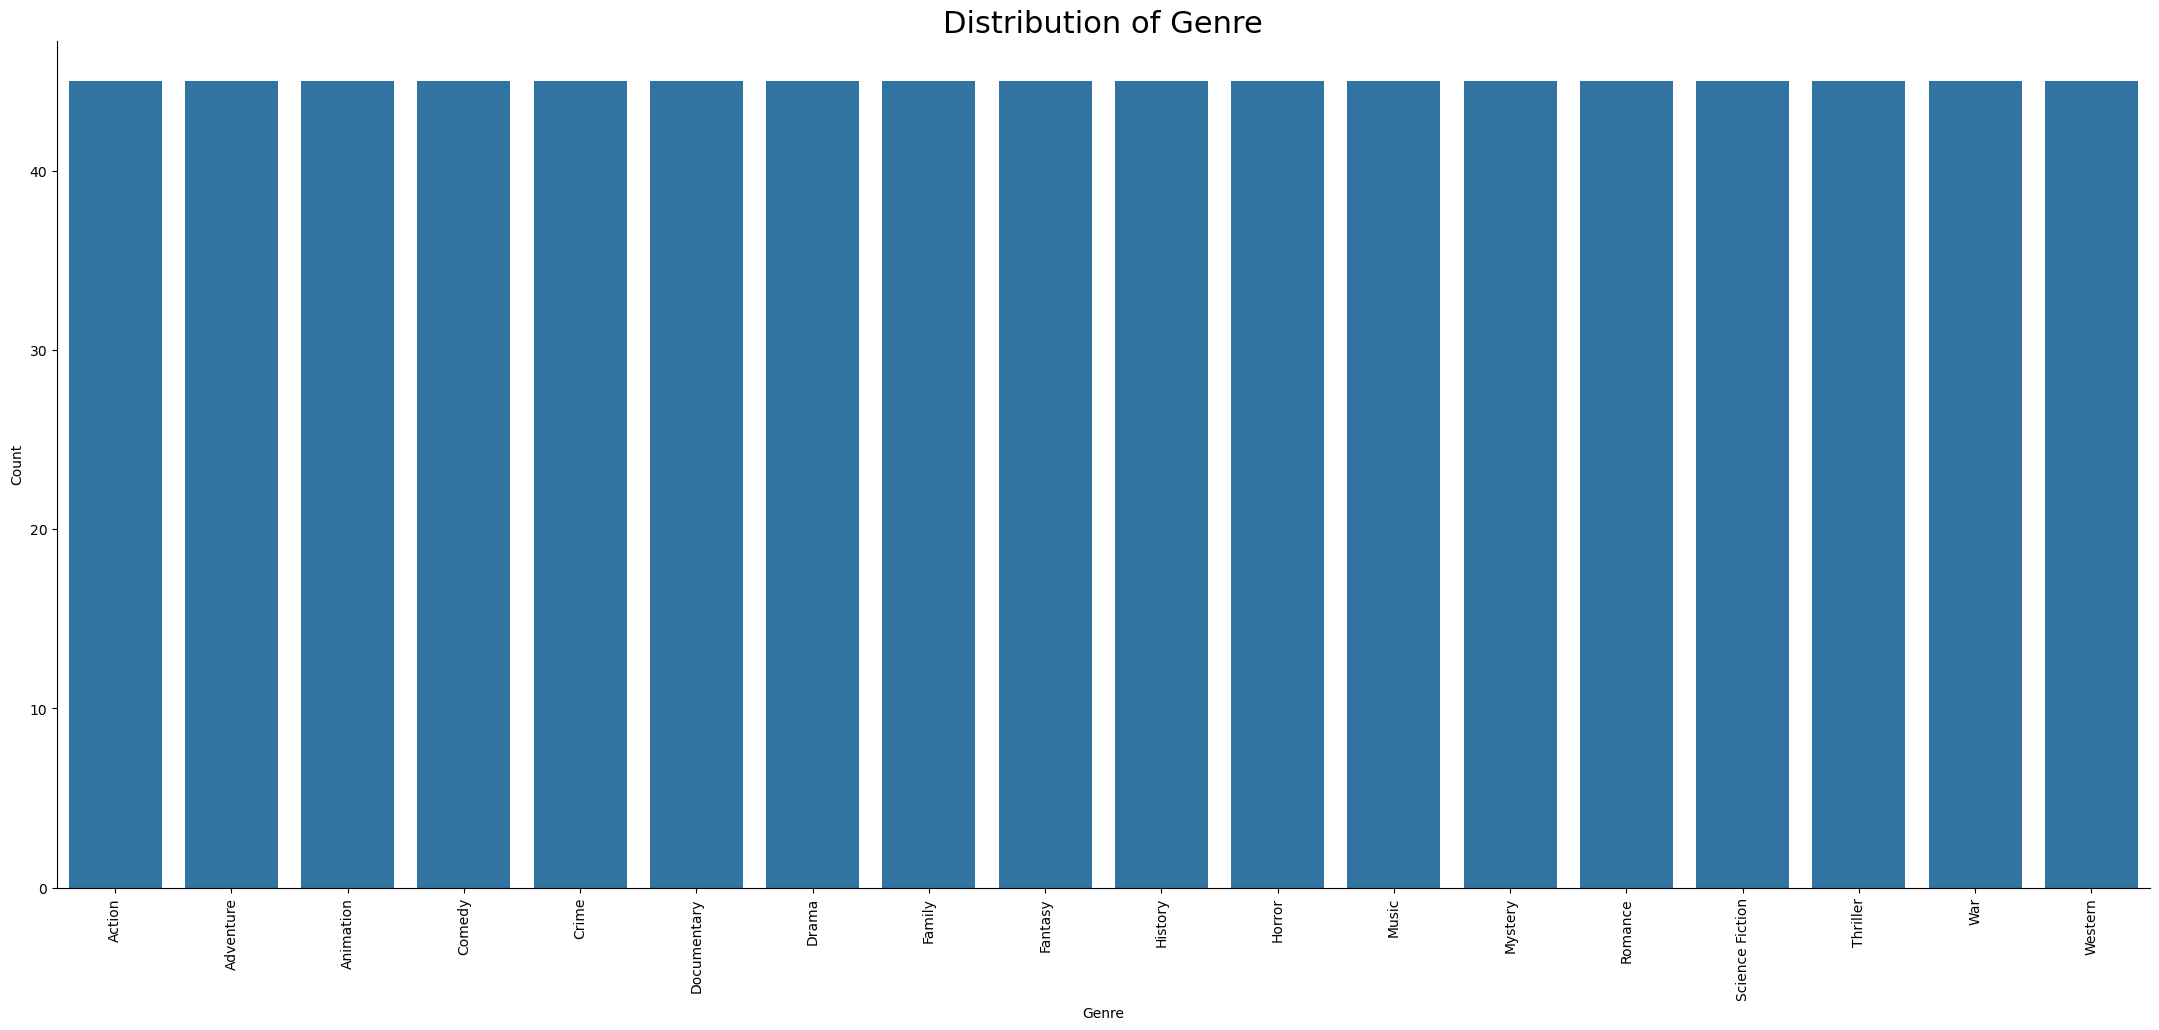

In [32]:
# Create a countplot for genre
fig, ax = plt.subplots(figsize=(27, 11))
sns.countplot(x='genre', data=sampled_df, ax=ax)

ax.set_title('Distribution of Genre', fontsize='22'); ax.set_ylabel('Count'); ax.set_xlabel('Genre')
ax.tick_params(axis='x', rotation=90)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)

plt.show()

In [33]:
sampled_df = pd.get_dummies(sampled_df, columns=['genre'])
sampled_df.columns

Index(['revenue', 'budget', 'vote_average', 'runtime', 'adult', 'genre_Action',
       'genre_Adventure', 'genre_Animation', 'genre_Comedy', 'genre_Crime',
       'genre_Documentary', 'genre_Drama', 'genre_Family', 'genre_Fantasy',
       'genre_History', 'genre_Horror', 'genre_Music', 'genre_Mystery',
       'genre_Romance', 'genre_Science Fiction', 'genre_Thriller', 'genre_War',
       'genre_Western'],
      dtype='object')

# Data Understanding/Visualization

To understand the relationship between revenue generated and the quantitative variables, scatter plots were created with the independent variables on the x-axis and revenue, the dependent variable, on the y-axis.  A regression line was plotted on the same grid to illustrate the relationship.  The only category that appeared to have some relationship with revenue was budget.  A correlation matrix was then created to verify this relationship.  Budget and revenue had a (.51) correlation coefficient which indicates a strong positive linear relationship.  The variable vote_average had the lowest score with (.027) illustrating an extremely weak positive linear relationship.  Runtime illustrated a weak linear relationship with a value of (.1).

To understand the relationship between genres and revenue, the dataset was transformed and a visualization consisting of boxplots for each genre was created.  The median value of revenue was calculated for each genre and genres were plotted in an ascending order by this metric.  This showed a positive relationship between revenue and genre when ordered by median.  The top 3 revenue producing genres starting with the most are family, thriller then comedy.  The bottom three starting with the least are documentary, war, then western.

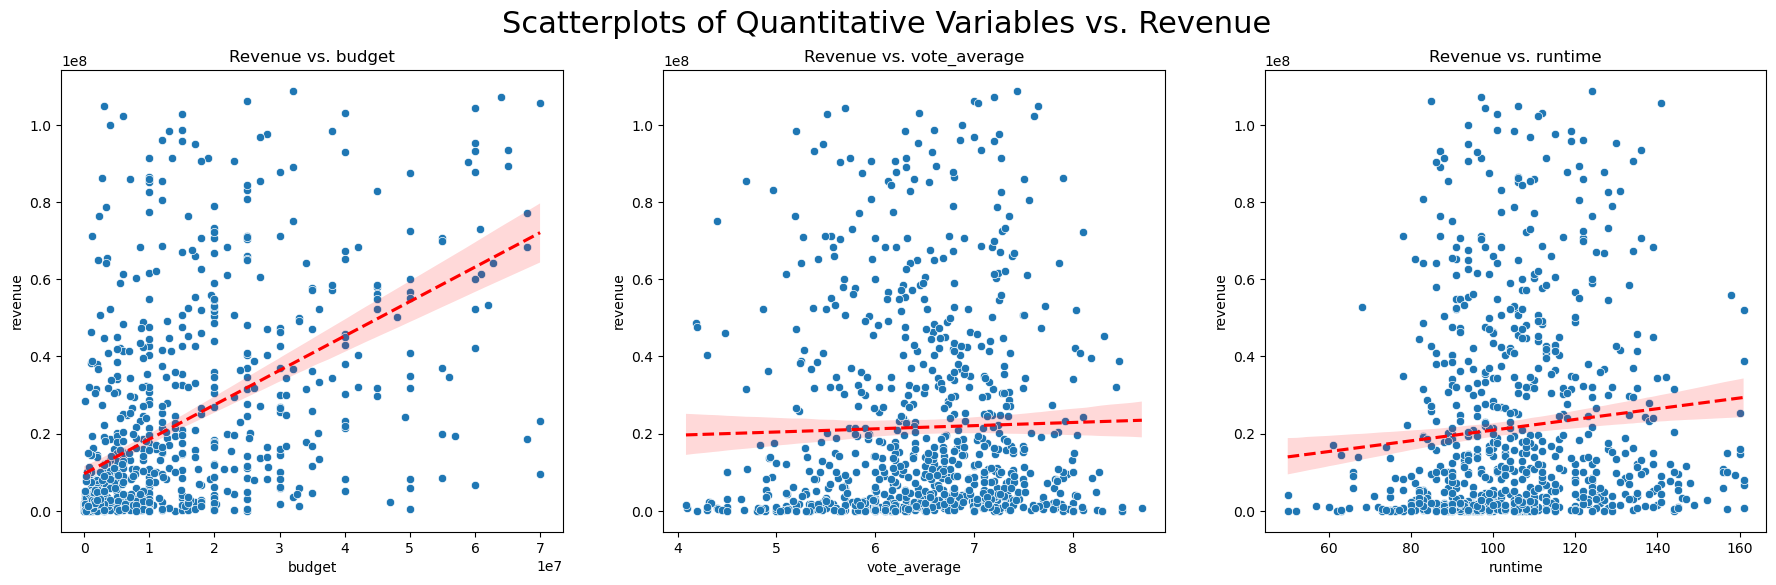

In [36]:
columns = ['budget', 'vote_average', 'runtime']

# Create scatterplots with line of best fit
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(22, 6))
fig.suptitle('Scatterplots of Quantitative Variables vs. Revenue', fontsize=22)

for i in range(3):
    sns.scatterplot(x=columns[i], y='revenue', data=sampled_df, ax=axes[i])
    sns.regplot(x=columns[i], y='revenue', data=sampled_df, ax=axes[i], scatter=False, color='red', line_kws={'linestyle':'--'})
    axes[i].set_title(f'Revenue vs. {columns[i]}')
    axes[i].set_xlabel(columns[i]); axes[i].set_ylabel('revenue')
plt.show()

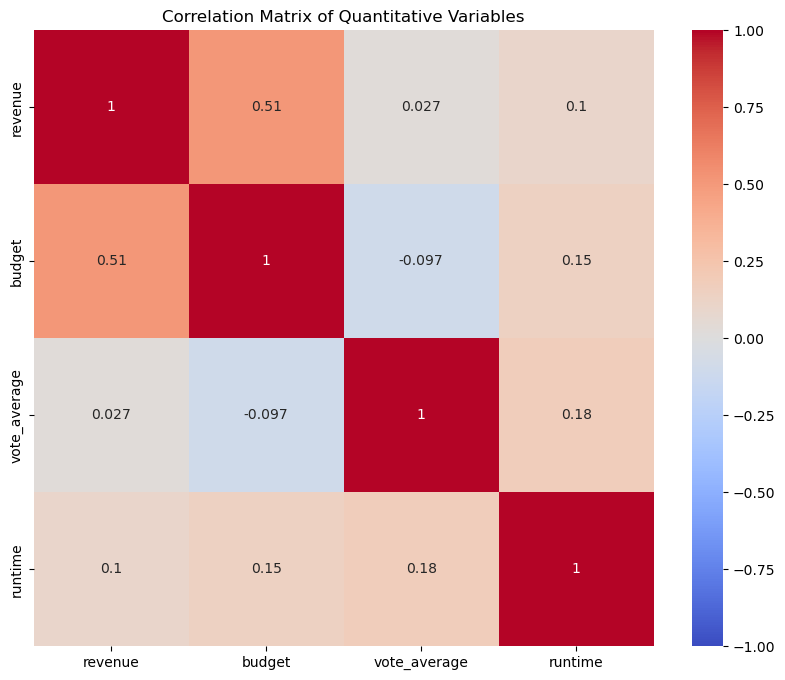

In [37]:
quantitative_df  = sampled_df[['revenue', 'budget', 'vote_average', 'runtime']]
#create and display correlation matrix of quantitative variables
corr_matrix = quantitative_df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1)

plt.title('Correlation Matrix of Quantitative Variables')
plt.show()

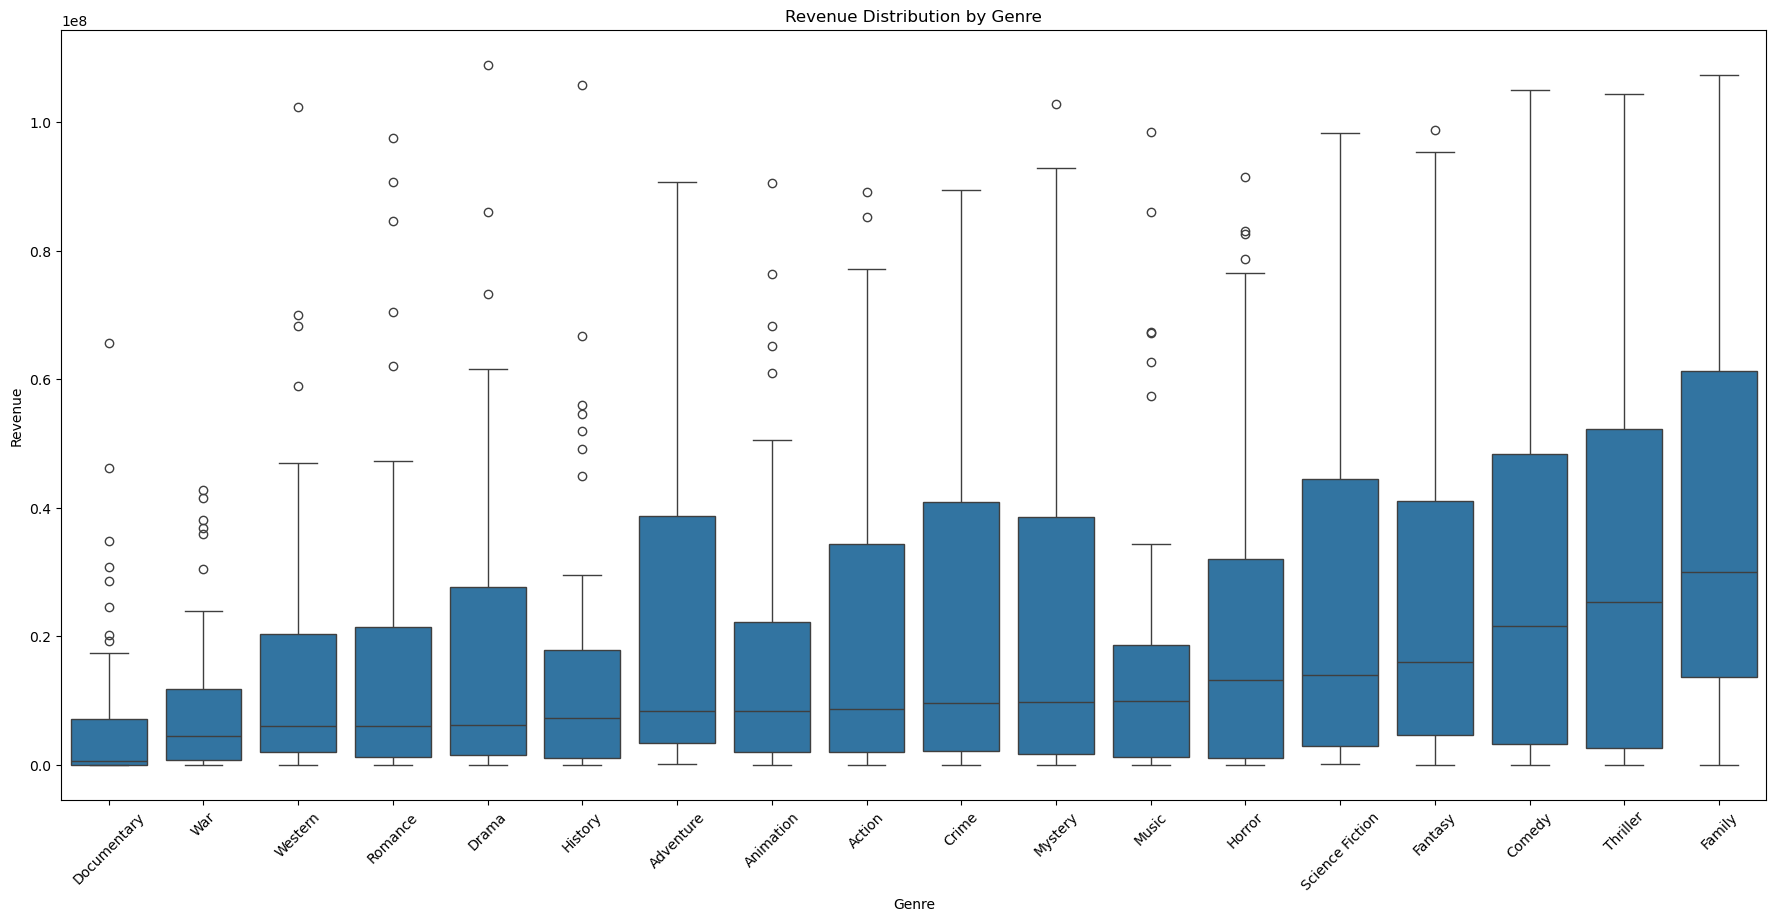

In [38]:
# convert df to long format
df_long = pd.melt(sampled_df, var_name='genre', value_name='has_genre', 
                  value_vars=[col for col in sampled_df.columns if col.startswith('genre_')])

# subset for rows where the genre is present
df_long = df_long[df_long['has_genre'] == 1]
df_long['revenue'] = sampled_df['revenue'].values

# remove genre_ prefix
df_long['genre'] = df_long['genre'].str.replace('genre_', '')

# Calculate median revenue for each genre
median_revenue = df_long.groupby('genre')['revenue'].median().sort_values()

# Order genres by median revenue (ascending)
order = median_revenue.index

# Create boxplots with genres ordered by median revenue
plt.figure(figsize=(22, 10))
sns.boxplot(x='genre', y='revenue', data=df_long, order=order)

plt.title('Revenue Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()


# Storytelling
Based on the correlation matrix and scatterplots of the quantitative variables, it is interesting to see the correlation of (.51) for budget and revenue.  I would have thought this would be a stronger relationship even though the relationship would be classified as a strong linear relationship.  In the future, I would consider mapping this relationship to a non-linear correlation to see if a curve would be a better fit.  I also did not expect the average IMDB rating of a film to have next to no linear relationship with revenue.  Further analysis could make this a potential indicator of revenue through feature engineering emphasizing the number of reviews used in calculating the average rating.

From the visualiztion of genres, this variable shows considerable promise in predicting revenue generated.  I expected the family genre to be the leading category, but was surprised with thriller being second in the list.  There could be some sampling biases in this visualization that could be improved through visualizing multiple samples and finding the margin of error.

My next steps would be to use the sampled dataframe to build a multiple linear regression model to better assess the significance of variables.  I would include all the variables and assess p-values, coefficient confidence intervals and standard error to determine the significance of the variables.  Based on the visualization process I would expect to drop vote average and potentially runtime from the model through this procces and that would answer the initial question of what variables impact revenue generated of a film.  I expect the answer to be budget and genre are good indicators of revenue generated.

# Impact